In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gzip, cPickle

from collections import namedtuple

In [2]:
files = glob.glob('../results/a2-Apr3/e*') 

In [3]:
files, len(files)

(['../results/a2-Apr3/errors9.pkl.gz',
  '../results/a2-Apr3/errors5.pkl.gz',
  '../results/a2-Apr3/errors10.pkl.gz',
  '../results/a2-Apr3/errors6.pkl.gz',
  '../results/a2-Apr3/errors2.pkl.gz',
  '../results/a2-Apr3/errors0.pkl.gz',
  '../results/a2-Apr3/errors3.pkl.gz',
  '../results/a2-Apr3/errors1.pkl.gz',
  '../results/a2-Apr3/errors7.pkl.gz',
  '../results/a2-Apr3/errors4.pkl.gz',
  '../results/a2-Apr3/errors11.pkl.gz',
  '../results/a2-Apr3/errors86.pkl.gz',
  '../results/a2-Apr3/errors8.pkl.gz',
  '../results/a2-Apr3/errors12.pkl.gz',
  '../results/a2-Apr3/errors15.pkl.gz',
  '../results/a2-Apr3/errors73.pkl.gz',
  '../results/a2-Apr3/errors16.pkl.gz',
  '../results/a2-Apr3/errors13.pkl.gz',
  '../results/a2-Apr3/errors17.pkl.gz',
  '../results/a2-Apr3/errors19.pkl.gz',
  '../results/a2-Apr3/errors127.pkl.gz',
  '../results/a2-Apr3/errors151.pkl.gz',
  '../results/a2-Apr3/errors21.pkl.gz',
  '../results/a2-Apr3/errors20.pkl.gz',
  '../results/a2-Apr3/errors14.pkl.gz',
  '../re

In [4]:
ex_list = []
for filename in files:
    ex = []
    ex.append(filename)
    with gzip.open(filename, "r") as f:
        with gzip.open(filename.replace('errors', 'params'), 'r') as f_param:
            errors = cPickle.load(f)
            params = cPickle.load(f_param)
            ex.extend(errors)
            ex.extend(params)
        
    ex_list.append(ex)

In [5]:
list(enumerate(ex_list[0]))

[(0, '../results/a2-Apr3/errors9.pkl.gz'),
 (1, array([ 0.06333848,  0.05381861,  0.03799097,  0.02707425,  0.02154113,
          0.01988787,  0.01189621,  0.00737904,  0.00497607,  0.00277656,
          0.0013167 ,  0.0008087 ])),
 (2, array([ 0.18377954,  0.06346539,  0.04547992,  0.03149332,  0.02589325,
          0.02575995,  0.01537078,  0.00851227,  0.00697683,  0.00416478,
          0.00209251,  0.0013529 ])),
 (3, 12.195296049118042),
 (4, 0.00078149961),
 (5, 0.0013529034),
 (6, 0.00048401882),
 (7, 0.00081539579),
 (8, 0.001004162),
 (9, 0.0016165952),
 (10, 25.262332005609995),
 (11, 4.0784986634626594e-07),
 (12, [0.77540153382069488, 0.86541734214811217]),
 (13, 0.0014742019107463204)]

In [6]:
for ex in ex_list:
    if np.isnan(ex[6]):
        ex[6] = 0.005
        ex[7] = 0.005
        ex[8] = 0.005
        ex[9] = 0.005

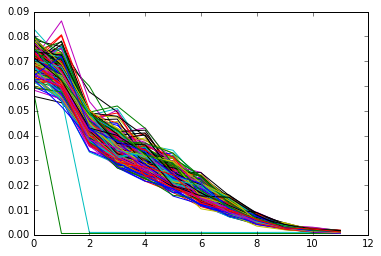

In [7]:
for i, ex in enumerate(ex_list):
    plt.plot(ex[1], label=str(i))

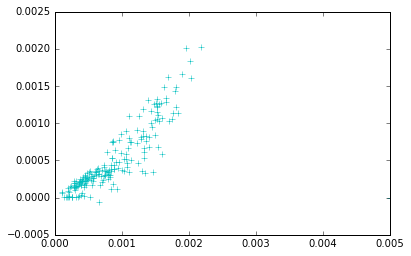

In [8]:
# トレーニングエラー小さいほうが、テスト誤差との残差も小さい
# 過学習してない
# もっとモデル大きくてもいい
plt.plot([ex[6] for ex in ex_list], [ex[7] - ex[6] for ex in ex_list], "c+")

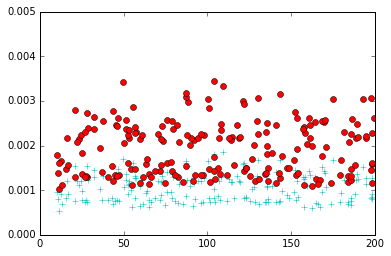

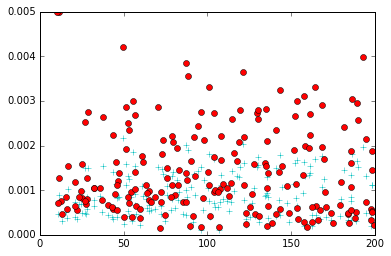

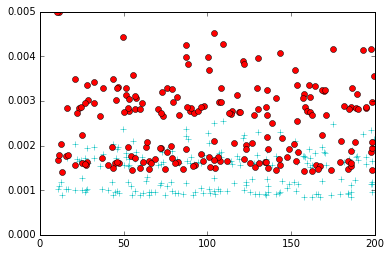

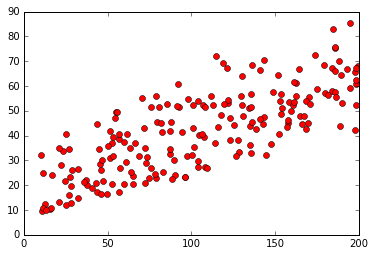

In [10]:
# n_hidden = 100のベスト感, n_hidden小さすぎるとだめそう
plt.plot([ex[10] for ex in ex_list], [ex[4] for ex in ex_list], 'c+')
plt.plot([ex[10] for ex in ex_list], [ex[5] for ex in ex_list], 'ro')
plt.ylim(0, 0.005)
plt.figure()
plt.plot([ex[10] for ex in ex_list], [ex[6] for ex in ex_list], 'c+')
plt.plot([ex[10] for ex in ex_list], [ex[7] for ex in ex_list], 'ro')
plt.ylim(0, 0.005)
plt.figure()
plt.plot([ex[10] for ex in ex_list], [ex[8] for ex in ex_list], 'c+')
plt.plot([ex[10] for ex in ex_list], [ex[9] for ex in ex_list], 'ro')
plt.ylim(0., 0.005)
plt.figure()
plt.plot([ex[10] for ex in ex_list], [ex[3] for ex in ex_list], 'ro')

plt.figure()

(0.0, 0.005)

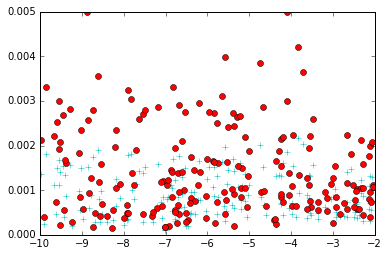

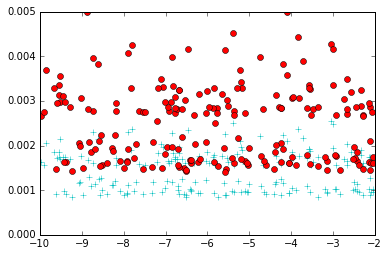

In [33]:
# l2 高いと不安定になる
plt.plot(np.log10([ex[11] for ex in ex_list]), [ex[6] for ex in ex_list], 'c+')
plt.plot(np.log10([ex[11] for ex in ex_list]), [ex[7] for ex in ex_list], 'ro')
plt.ylim(0, 0.005)
plt.figure()
plt.plot(np.log10([ex[11] for ex in ex_list]), [ex[8] for ex in ex_list], 'c+')
plt.plot(np.log10([ex[11] for ex in ex_list]), [ex[9] for ex in ex_list], 'ro')
plt.ylim(0., 0.005)

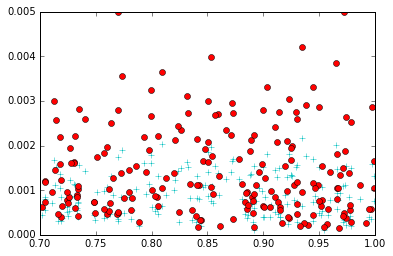

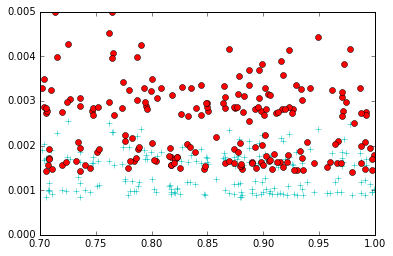

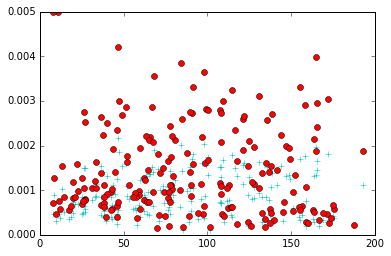

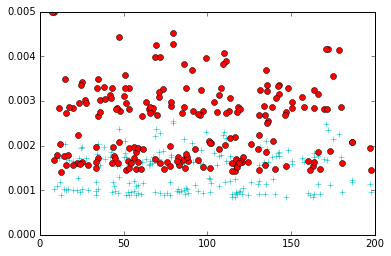

In [42]:
# 落とさなくて良さそう 0.95, 0.85だと最小値はいいけどばらついているので過学習,0.8, 0.8くらいでいいか
plt.plot([ex[12][0] for ex in ex_list], [ex[6] for ex in ex_list], 'c+')
plt.plot([ex[12][0] for ex in ex_list], [ex[7] for ex in ex_list], 'ro')
plt.ylim(0, 0.005)
plt.figure()
plt.plot([ex[12][1] for ex in ex_list], [ex[8] for ex in ex_list], 'c+')
plt.plot([ex[12][1] for ex in ex_list], [ex[9] for ex in ex_list], 'ro')
plt.ylim(0., 0.005)
plt.figure()

# n*pはほぼ効いてない
plt.plot([ex[12][0]*ex[10] for ex in ex_list], [ex[6] for ex in ex_list], 'c+')
plt.plot([ex[12][0]*ex[10] for ex in ex_list], [ex[7] for ex in ex_list], 'ro')
plt.ylim(0, 0.005)
plt.figure()
plt.plot([ex[12][1]*ex[10] for ex in ex_list], [ex[8] for ex in ex_list], 'c+')
plt.plot([ex[12][1]*ex[10] for ex in ex_list], [ex[9] for ex in ex_list], 'ro')
plt.ylim(0., 0.005)
plt.figure()

(0.0, 0.005)

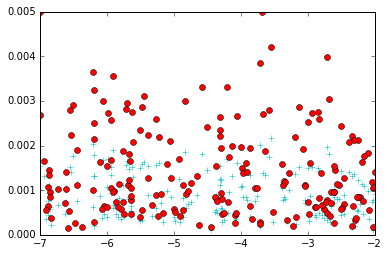

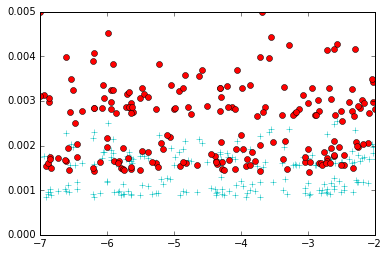

In [37]:
# gamma_scale 敏感すぎ 小さいほうがいい 10**-7くらいでいいか なんかちいさいよね
plt.plot(np.log10([ex[13] for ex in ex_list]), [ex[6] for ex in ex_list], 'c+')
plt.plot(np.log10([ex[13] for ex in ex_list]), [ex[7] for ex in ex_list], 'ro')
plt.ylim(0, 0.005)
plt.figure()
plt.plot(np.log10([ex[13] for ex in ex_list]), [ex[8] for ex in ex_list], 'c+')
plt.plot(np.log10([ex[13] for ex in ex_list]), [ex[9] for ex in ex_list], 'ro')
plt.ylim(0., 0.005)